> ## **Group 8 - STINTSY S17**
> Members:
> - CRUZ, GIOVANNI JONATHAN
> - LIM, NATHAN MIGUEL
> - LUISTRO, JOSIAH MARI
> - MANGAWANG, FELIX MELFORD

---

# Introduction

## Labor Force Survey 2016

Taken from the Philippine Statistics Authority (PSA), the dataset is a survey conducted in 2016 with respect in Demographic, Economic Characteristics and Past Quarter Activities of the surveyed individuals in this dataset.

The group picked this dataset over the family dataset because of its recency (2016 over 2012), simplicity of raw data (50 columns instead of 116), and most importantly a general group interest on the labor force dataset as a whole.

## Task

With this, the group decided to make a classification task with a target variable of `PUFC23_PCLASS`. This variable is described on the website as the Class of Worker on their Primary Occupation.

This variable has 6 different values listed in the value set, namely:
0. Worked for private household
1. Worked for private establishment
2. Worked for government/government corporation
3. Self-employed without any paid employee
4. Employer in own family-operated farm or business
5. Worked with pay on own family-operated farm or business
6. Worked without pay on own family-operated farm or business

To briefly explain, the variable is the catgory of the person's relationship to the establishment he works in. According to the [data dictionary](https://psada.psa.gov.ph/catalog/67/data-dictionary/F1?file_name=lfs_april2016), this is referred to as the "Industrial Status" in other countries.

# Artificial Neural Network

# Description of the Dataset

The survey covers individuals aged 15 years and older and provides insights into labor market trends at both national and regional levels (17 administrative regions). Key variables include employment status, industry, occupation, hours worked, and demographic details like age, sex, and education.

The data was collected through face-to-face interviews administered to 42,768 sample households. Considering how many people are in a single household, the total of 180,862 data points makes sense.

The 2013 Master Sample (MS) was used, with Primary Sampling Units (PSUs) stratified by geographic location, household wealth, and overseas worker prevalence.

The dataset has different key characteristics that can be inferred:
> Demographic Characteristics:
>
> - Household ID
> - Age
> - Sex
> - Marital Status
> - Highest Grade Completed
> - Overseas Worker Indicator

> Economic Characteristics:
>
> - Employment Status
> - Industry Group
> - Occupation
> - Hours Worked
> - Job Search Method


> Geographic Coverage:
>
> - Region
> - Urban/Rural

> Other Notable Features:
>
> - Class of Worker
> - Household Head Indicators



# Python libraries and modules used.


| LIBRARY | PURPOSE |
| ------- | ------- |
| pandas | Data table manipulation |
| numpy | Matrix operations |
| ydata_profiling | Create a report for easier EDA |
| sklearn | Mostly used for preprocessing, also used for making models |
| matplotlib | Plot graphs and visualize data |
| imblearn | To do SMOTE on imbalanced data |

> ⚠ **Run these when using Google Colab**

In [100]:
# Run for google colab
!git clone https://github.com/tinySculpture/STINTSY-Project.git
%cd STINTSY-Project/

d:\VSCODE Projects\Python\STINTSY-Project\STINTSY-Project


Cloning into 'STINTSY-Project'...
d:\VSCODE Projects\Python\.venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [101]:
%cd STINTSY-Project/

[WinError 2] The system cannot find the file specified: 'STINTSY-Project/'
d:\VSCODE Projects\Python\STINTSY-Project\STINTSY-Project


d:\VSCODE Projects\Python\.venv\Lib\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [102]:
!pip install ydata-profiling --quiet

In [103]:
!pip install --quiet optuna

In [104]:
import optuna
print(optuna.__version__)

4.2.1


> ⚠ End of Cells for Google Colab

In [1]:
%load_ext autoreload
%autoreload 2

# Import libraries
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

c:\Users\cruzg\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data Preprocessing

TBA

## Read dataset

In [2]:
df = pd.read_csv("LFS PUF April 2016.CSV")

## Create a Profile Report
Using ydata-profiling, we can generate a profile report to get an overview of the dataset. A function can be defined to generate the report and save it as an HTML file.

In [107]:
def generate_report(dataframe, filename=""):
    report = ProfileReport(dataframe)
    report.to_file(filename + ".html")

In [ ]:
generate_report(df, 'report-raw')

  8%|▊         | 4/50 [00:04<00:48,  1.05s/it]06<00:40,  1.18s/it, Describe variable: PUFC26_OJOB]   


### Data Cleaning

1. Force Missing Values to NaN to correctly identify missing values because of different data types. (Int, Float, and Object)
2. Delete duplicated rows (keep the first instance)

There are missing data that are represented as different invisible characters - replace them with an empty string

In [3]:
df.isna().sum()

PUFREG             0
PUFPRV             0
PUFPRRCD           0
PUFHHNUM           0
PUFURB2K10         0
PUFPWGTFIN         0
PUFSVYMO           0
PUFSVYYR           0
PUFPSU             0
PUFRPL             0
PUFHHSIZE          0
PUFC01_LNO         0
PUFC03_REL         0
PUFC04_SEX         0
PUFC05_AGE         0
PUFC06_MSTAT       0
PUFC07_GRADE       0
PUFC08_CURSCH      0
PUFC09_GRADTECH    0
PUFC10_CONWR       0
PUFC11_WORK        0
PUFC12_JOB         0
PUFC14_PROCC       0
PUFC16_PKB         0
PUFC17_NATEM       0
PUFC18_PNWHRS      0
PUFC19_PHOURS      0
PUFC20_PWMORE      0
PUFC21_PLADDW      0
PUFC22_PFWRK       0
PUFC23_PCLASS      0
PUFC24_PBASIS      0
PUFC25_PBASIC      0
PUFC26_OJOB        0
PUFC27_NJOBS       0
PUFC28_THOURS      0
PUFC29_WWM48H      0
PUFC30_LOOKW       0
PUFC31_FLWRK       0
PUFC32_JOBSM       0
PUFC33_WEEKS       0
PUFC34_WYNOT       0
PUFC35_LTLOOKW     0
PUFC36_AVAIL       0
PUFC37_WILLING     0
PUFC38_PREVJOB     0
PUFC40_POCC        0
PUFC41_WQTR  

In [4]:
# df.replace(["", " ", "NA", "N/A", "-", "NULL"], np.nan, inplace=True)
df.replace("", np.nan, inplace=True)

In [5]:
df = df.map(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)

### Sanity Checking
Check if missing data is properly replaced with NaN

In [6]:
df

,PUFREG,PUFPRV,PUFPRRCD,PUFHHNUM,PUFURB2K10,PUFPWGTFIN,PUFSVYMO,PUFSVYYR,PUFPSU,PUFRPL,...,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT
0,1,28,2800,1,2,405.2219,4,2016,217,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,01,1
1,1,28,2800,1,2,388.8280,4,2016,217,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,01,1
2,1,28,2800,1,2,406.1194,4,2016,217,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,01,1
3,1,28,2800,2,2,405.2219,4,2016,217,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,01,1
4,1,28,2800,2,2,384.3556,4,2016,217,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,96,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180857,17,59,5900,40880,2,239.4341,4,2016,258,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,50,1
180858,17,59,5900,40880,2,189.8885,4,2016,258,1,...,NaN,8,NaN,NaN,NaN,2,NaN,NaN,NaN,3
180859,17,59,5900,40880,2,207.7395,4,2016,258,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180860,17,59,5900,40880,2,207.7395,4,2016,258,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Impute missing values

- Fill numerical columns with their *mean*.
- Fill categorical values with their *mode*.

In [7]:
# Replace numeric values with mean
df.fillna(df.select_dtypes(include=["number"]).mean(numeric_only=True), inplace=True)

# Replace categorical values with mode
for col in df.select_dtypes(include=["object"]):
    mode_value = df[col].mode()[0] if not df[col].mode().empty else "unknown"
    df[col] = df[col].fillna(mode_value)

df

,PUFREG,PUFPRV,PUFPRRCD,PUFHHNUM,PUFURB2K10,PUFPWGTFIN,PUFSVYMO,PUFSVYYR,PUFPSU,PUFRPL,...,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT
0,1,28,2800,1,2,405.2219,4,2016,217,1,...,002,7,1,1,1,1,52,1,01,1
1,1,28,2800,1,2,388.8280,4,2016,217,1,...,002,7,1,1,1,1,52,1,01,1
2,1,28,2800,1,2,406.1194,4,2016,217,1,...,002,7,1,1,1,1,52,1,01,1
3,1,28,2800,2,2,405.2219,4,2016,217,1,...,002,7,1,1,1,1,52,1,01,1
4,1,28,2800,2,2,384.3556,4,2016,217,1,...,002,7,1,1,1,1,52,1,96,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180857,17,59,5900,40880,2,239.4341,4,2016,258,1,...,002,7,1,1,1,1,52,1,50,1
180858,17,59,5900,40880,2,189.8885,4,2016,258,1,...,002,8,1,1,1,2,52,1,01,3
180859,17,59,5900,40880,2,207.7395,4,2016,258,1,...,002,7,1,1,1,1,52,1,01,1
180860,17,59,5900,40880,2,207.7395,4,2016,258,1,...,002,7,1,1,1,1,52,1,01,1


### Delete Unnecessary Columns

- Delete constant values (Month, Year)
    - PUFSVYYR
    - PUFSVYMO
- Delete IDs
    - PUFPRRCD (-0.035)
    - PUFHHNUM (0.021)
    - PUFREG (0.020)
- Delete Columns with low correlation to target variable (Within -0.05 to +0.05)
    - PUF10_CONWR (0.037)
    - PUFC14_PROCC (-0.490)
    - PUFC25_PBASIC (0.035)
    - PUFC27_NJOBS (0.035)
    - PUFC31_FLWRK (0.026)
    - PUFC32_JOBSM (0.031)
    - PUFC33_WEEKS (-0.014)
    - PUFC34_WYNOT (-0.019)
    - PUFC35_LTLOOKW (0.026)
    - PUFC37_WILLING (0.046)
    - PUFPRV (-0.035)
    - PUFRPL (0.004)
- Delete data not useful for prediction
    - PUFC41_WQTR - Work in the previous quarter
    - PUFC43_QKB - Kind of business in the previous quarter
    - PUFC40_POCC - Previous occupation if unemployed (we need employment class)
    - PUFWGTFIN - Weight used for surveying
    - PUFPSU - Primary Sampling Unit (PSU) useful for survey design but not for prediction
    - PUFC12_JOB - PUFC11_WORK is more useful
    - PUFC36_AVAIL - Availability for work (useful for unemployed people)
    - PUFC19_PHOURS - Hours worked in the previous week
    - PUFC38_PREVJOB - Previous job if employed (we need current job)

In [8]:
drop_cols = [
    # IDs, Constants
    "PUFSVYYR", "PUFSVYMO", "PUFPRRCD", "PUFHHNUM", "PUFREG",
    # Low correlation
    "PUFC01_LNO", "PUFC10_CONWR", "PUFC14_PROCC", "PUFC25_PBASIC", "PUFC27_NJOBS", "PUFC31_FLWRK", "PUFC32_JOBSM", "PUFC33_WEEKS", "PUFC34_WYNOT", "PUFC35_LTLOOKW", "PUFC37_WILLING", "PUFPRV", "PUFRPL",
    # Not useful for prediction of type of worker
    "PUFC41_WQTR", "PUFC43_QKB", "PUFC40_POCC", "PUFPWGTFIN", "PUFPSU", "PUFC12_JOB", "PUFC36_AVAIL", "PUFC19_PHOURS", "PUFC38_PREVJOB"
]
df.drop(columns=drop_cols, inplace=True)

In [9]:
df

,PUFURB2K10,PUFHHSIZE,PUFC03_REL,PUFC04_SEX,PUFC05_AGE,PUFC06_MSTAT,PUFC07_GRADE,PUFC08_CURSCH,PUFC09_GRADTECH,PUFC11_WORK,...,PUFC20_PWMORE,PUFC21_PLADDW,PUFC22_PFWRK,PUFC23_PCLASS,PUFC24_PBASIS,PUFC26_OJOB,PUFC28_THOURS,PUFC29_WWM48H,PUFC30_LOOKW,PUFNEWEMPSTAT
0,2,3,1,1,49,2,350,1,2,1,...,1,1,2,3,4,1,032,1,2,1
1,2,3,2,2,61,2,350,1,2,1,...,2,2,2,6,4,2,008,1,2,1
2,2,3,3,1,19,1,350,2,2,1,...,1,1,2,1,3,1,034,1,2,1
3,2,4,1,1,48,2,320,1,2,1,...,1,1,2,3,4,1,033,1,2,1
4,2,4,2,2,41,2,350,1,2,1,...,2,2,2,0,4,2,072,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180857,2,5,1,1,29,2,350,1,2,1,...,2,2,2,4,4,2,040,1,2,1
180858,2,5,2,2,29,2,830,1,2,2,...,2,2,2,1,4,2,048,1,2,3
180859,2,5,3,2,4,1,350,1,2,2,...,2,2,2,1,4,2,048,1,2,1
180860,2,5,3,2,2,1,350,1,2,2,...,2,2,2,1,4,2,048,1,2,1


### Recheck EDA

Check if the data has been changed significantly, and if the statistical tests are still the same after imputation and feature reduction.

In [ ]:
generate_report(df, "report-cleaned")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 23/23 [00:01<00:00, 14.41it/s][A


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

After checking the EDA again, duplicate data is present since there are columns that have been deleted.

In [10]:
print("Duplicates: ", df.duplicated().sum())

Duplicates:  70326


In [11]:
df = df.drop_duplicates()
print("Duplicates after dropping: ", df.duplicated().sum())

Duplicates after dropping:  0


#### Binning and Encoding

- One-hot encode categorical values

In [12]:
# One hot encode binary categorical columns
cat_cols = ['PUFURB2K10', 'PUFC04_SEX', 'PUFC08_CURSCH', 'PUFC09_GRADTECH', 'PUFC11_WORK', 'PUFC20_PWMORE', "PUFC21_PLADDW", 'PUFC22_PFWRK', 'PUFC26_OJOB', "PUFC30_LOOKW"]

df = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=float)
df = df.rename(
    columns = {
        "PUFURB2K10_2": "Is_Rural",
        "PUFC04_SEX_2": "Is_Female",
        "PUFC08_CURSCH_2": "Is_Not_In_School",
        "PUFC09_GRADTECH_2": "Is_Not_In_Techvoc",
        "PUFC11_WORK_2": "Is_Not_Working",
        "PUFC20_PWMORE_2": "Has_Not_Wanted_More_Hours",
        "PUFC21_PLADDW_2": "Has_Not_Looked_For_Work",
        "PUFC22_PFWRK_2": "Is_Not_First_Time",
        "PUFC26_OJOB_2": "No_Other_Job",
        "PUFC30_LOOKW_2": "Has_Not_Looked_For_Work_Week"
    }
)

In [13]:
def one_hot_encode(df, df_col, df_new_col, category_map):
    df[df_new_col] = df[df_col].apply(category_map)

    # One hot encode the new categories
    encoder = OneHotEncoder(sparse_output=False, drop="first")
    encoded = encoder.fit_transform(df[[df_new_col]])
    encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([df_new_col]), index=df.index)

    return pd.concat([df, encoded_df], axis=1)

In [14]:
df

,PUFHHSIZE,PUFC03_REL,PUFC05_AGE,PUFC06_MSTAT,PUFC07_GRADE,PUFC16_PKB,PUFC17_NATEM,PUFC18_PNWHRS,PUFC23_PCLASS,PUFC24_PBASIS,...,Is_Rural,Is_Female,Is_Not_In_School,Is_Not_In_Techvoc,Is_Not_Working,Has_Not_Wanted_More_Hours,Has_Not_Looked_For_Work,Is_Not_First_Time,No_Other_Job,Has_Not_Looked_For_Work_Week
0,3,1,49,2,350,01,1,08,3,4,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,3,2,61,2,350,01,2,04,6,4,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,3,3,19,1,350,01,2,08,1,3,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,4,1,48,2,320,01,1,04,3,4,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4,2,41,2,350,96,1,12,0,4,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180850,7,1,34,2,000,03,1,05,3,4,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
180851,7,2,32,2,000,01,1,04,3,4,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
180857,5,1,29,2,350,50,1,08,4,4,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
180858,5,2,29,2,830,01,1,08,1,4,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### PUFC07_GRADE
This classification data contains a lot of values in the value set. It can be noticed that there are different values for highest educational attainment and the program category. Since they are only one column, it might be better to encode the highest educational attainment as an ordinal encoded variable, and the program category as 15 different categories instead of 50+.

In [15]:
education_categories = {
    "Primary": ["000", "010", "210", "220", "230", "240", "250", "260", "280"],
    "Secondary": ["310", "320", "330", "340", "350"],
    "Post-Secondary": ["410", "420", "810", "820", "830", "840", "900"],
    "STEM": ["542", "544", "548", "552", "554", "558", "562", "564", "572", "642", "644", "646", "648", "652", "654", "658", "662", "664", "672"],
    "Business": ["534", "634", "638"],
    "Art": ["521", "522", "531", "532", "621", "622", "631", "632"],
    "Other": ["501", "508", "509", "514", "576", "581", "584", "585", "586", "601", "614", "676", "681", "684", "685", "686", "589", "689"]
}


def get_education_category(x):
    for key, values in education_categories.items():
        if x in values:
            return key
    return "Unknown"

In [16]:
df = one_hot_encode(df, "PUFC07_GRADE", "Education", get_education_category)

### PUFC16_PKB
The valueset offers a binning for this column already. The values are binned into 3 categories: Agriculture, Industry, Services.

In [17]:
industry_categories = {
    "Agriculture": range(1, 3),
    "Industry": range(5, 43),
    "Services": range(45, 99)
}

def get_industry_category(x):
    for key, values in industry_categories.items():
        if x in values:
            return key
    return "Unknown"

In [18]:
df = one_hot_encode(df, "PUFC16_PKB", "KindOfBusiness", get_industry_category)

### PUFC29_WWM48H
One hot encode based on the given reasons for working more than 48 hours.

1. Want - Wanted more earnings
2. Requirement - Requirements of the job
3. Exceptional - Exceptional week
4. Passion - Ambition, passion for job
5. Other - Other reasons


In [19]:
reason_categories = {
    'Want': "1",
    'Requirement': "2",
    'Exceptional': "3",
    'Passion': "4",
    'Other': "5"
}

def get_reason_category(x):
    for key, value in reason_categories.items():
        if x == value:
            return key

    return "Unknown"

df_col = "PUFC29_WWM48H"
df_new_col = "Work48H"

In [20]:
df = one_hot_encode(df, "PUFC29_WWM48H", "Work48H", get_reason_category)

### PUFNEWEMPSTAT
One hot encode the categories if the individual is employed, not employed, or not in workforce.

In [21]:
workforce_categories = {
    'Employed': "1",
    'Unemployed': "2",
    'NotInWorkForce': "3",
}

def get_workforce_category(x):
    for key, value in workforce_categories.items():
        if x == value:
            return key

    return "Unknown"


In [22]:
df = one_hot_encode(df, "PUFNEWEMPSTAT", "Employment_Status", get_workforce_category)

### PUFC17_NATEM
One hot encode the categories if permanent, short-term, or different employer.

In [23]:
nature_categories = {
    "Permanent": "1",
    "Short-Term": "2",
    "Different_Employer": "3",
}

def get_nature_category(x):
    for key, value in nature_categories.items():
        if x == value:
            return key

    return "Unknown"

In [24]:
df = one_hot_encode(df, "PUFC17_NATEM", "NatureOfEmployment", get_nature_category)

In [25]:
df.drop(columns=["PUFC07_GRADE", "Education", "PUFC16_PKB", "KindOfBusiness", "PUFC29_WWM48H", "Work48H", "PUFNEWEMPSTAT", "Employment_Status", "PUFC17_NATEM", "NatureOfEmployment"], inplace=True)

In [26]:
df

,PUFHHSIZE,PUFC03_REL,PUFC05_AGE,PUFC06_MSTAT,PUFC18_PNWHRS,PUFC23_PCLASS,PUFC24_PBASIS,PUFC28_THOURS,Is_Rural,Is_Female,...,Education_STEM,Education_Secondary,Work48H_Other,Work48H_Passion,Work48H_Requirement,Work48H_Want,Employment_Status_NotInWorkForce,Employment_Status_Unemployed,NatureOfEmployment_Permanent,NatureOfEmployment_Short-Term
0,3,1,49,2,08,3,4,032,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,3,2,61,2,04,6,4,008,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,3,3,19,1,08,1,3,034,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,1,48,2,04,3,4,033,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,4,2,41,2,12,0,4,072,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180850,7,1,34,2,05,3,4,040,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
180851,7,2,32,2,04,3,4,048,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
180857,5,1,29,2,08,4,4,040,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
180858,5,2,29,2,08,1,4,048,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


### Label Encoding

Label encode remaining variables with more than 2 categories that can be ordered.

In [27]:
df["Hours_Work_Total"] = pd.to_numeric(df["PUFC28_THOURS"], errors="coerce").astype('int64')

In [28]:
encoder = LabelEncoder()
df["Marital_Status"] = encoder.fit_transform(df["PUFC06_MSTAT"]).astype('int64')
df["Working_Hours_Per_Week"] = encoder.fit_transform(df["PUFC18_PNWHRS"]).astype('int64')
df["Class_Of_Worker"] = encoder.fit_transform(df["PUFC23_PCLASS"]).astype('int64')
df["Payment_Basis"] = encoder.fit_transform(df["PUFC24_PBASIS"]).astype('int64')

In [29]:
df.drop(columns=["PUFC06_MSTAT", "PUFC18_PNWHRS", "PUFC23_PCLASS", "PUFC24_PBASIS", "PUFC28_THOURS"], inplace=True)

Rename Remaining Variables

In [30]:
df = df.rename(columns={
    "PUFHHSIZE": "Household_Size",
    "PUFC03_REL": "Relationship",
    "PUFC05_AGE": "Age",
})

In [31]:
df.duplicated().sum()

np.int64(13200)

In [32]:
df.drop_duplicates()

,Household_Size,Relationship,Age,Is_Rural,Is_Female,Is_Not_In_School,Is_Not_In_Techvoc,Is_Not_Working,Has_Not_Wanted_More_Hours,Has_Not_Looked_For_Work,...,Work48H_Want,Employment_Status_NotInWorkForce,Employment_Status_Unemployed,NatureOfEmployment_Permanent,NatureOfEmployment_Short-Term,Hours_Work_Total,Marital_Status,Working_Hours_Per_Week,Class_Of_Worker,Payment_Basis
0,3,1,49,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,32,1,7,3,4
1,3,2,61,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,8,1,3,6,4
2,3,3,19,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,34,0,7,1,3
3,4,1,48,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,33,1,3,3,4
4,4,2,41,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,72,1,11,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180848,6,3,25,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,45,0,7,2,4
180850,7,1,34,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,40,1,4,3,4
180851,7,2,32,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,48,1,3,3,4
180857,5,1,29,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,40,1,7,4,4


In [ ]:
generate_report(df, "report-encoded")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 32/32 [00:01<00:00, 25.91it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Transformation
This is to apply different techniques to normalize the data and make it more suitable for machine learning models.

In [33]:
from data_transformation import DataTransformer

DT = DataTransformer(df)
DT.transform_data()

This shows the skewed columns that have been transformed.

In [34]:
DT.scale_features()

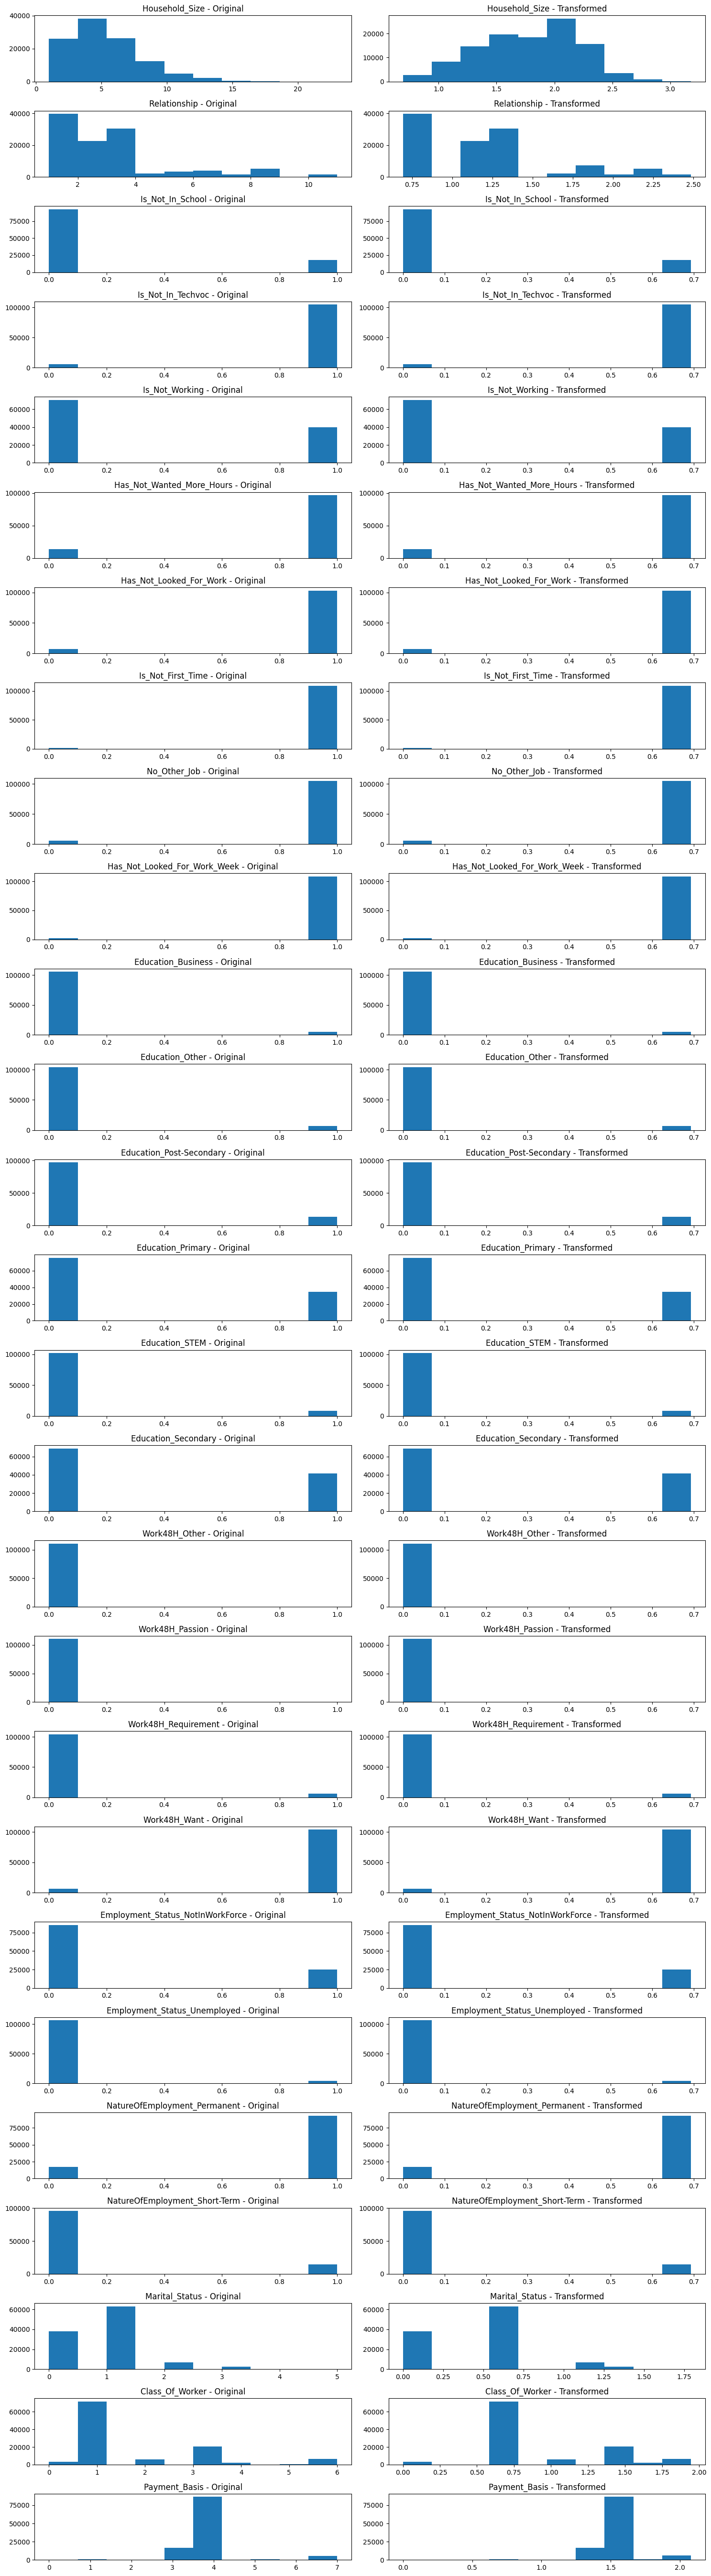

In [32]:
DT.visualize()

This shows the scaled columns after transformation.

In [35]:
transformed_df = DT.scaled_df

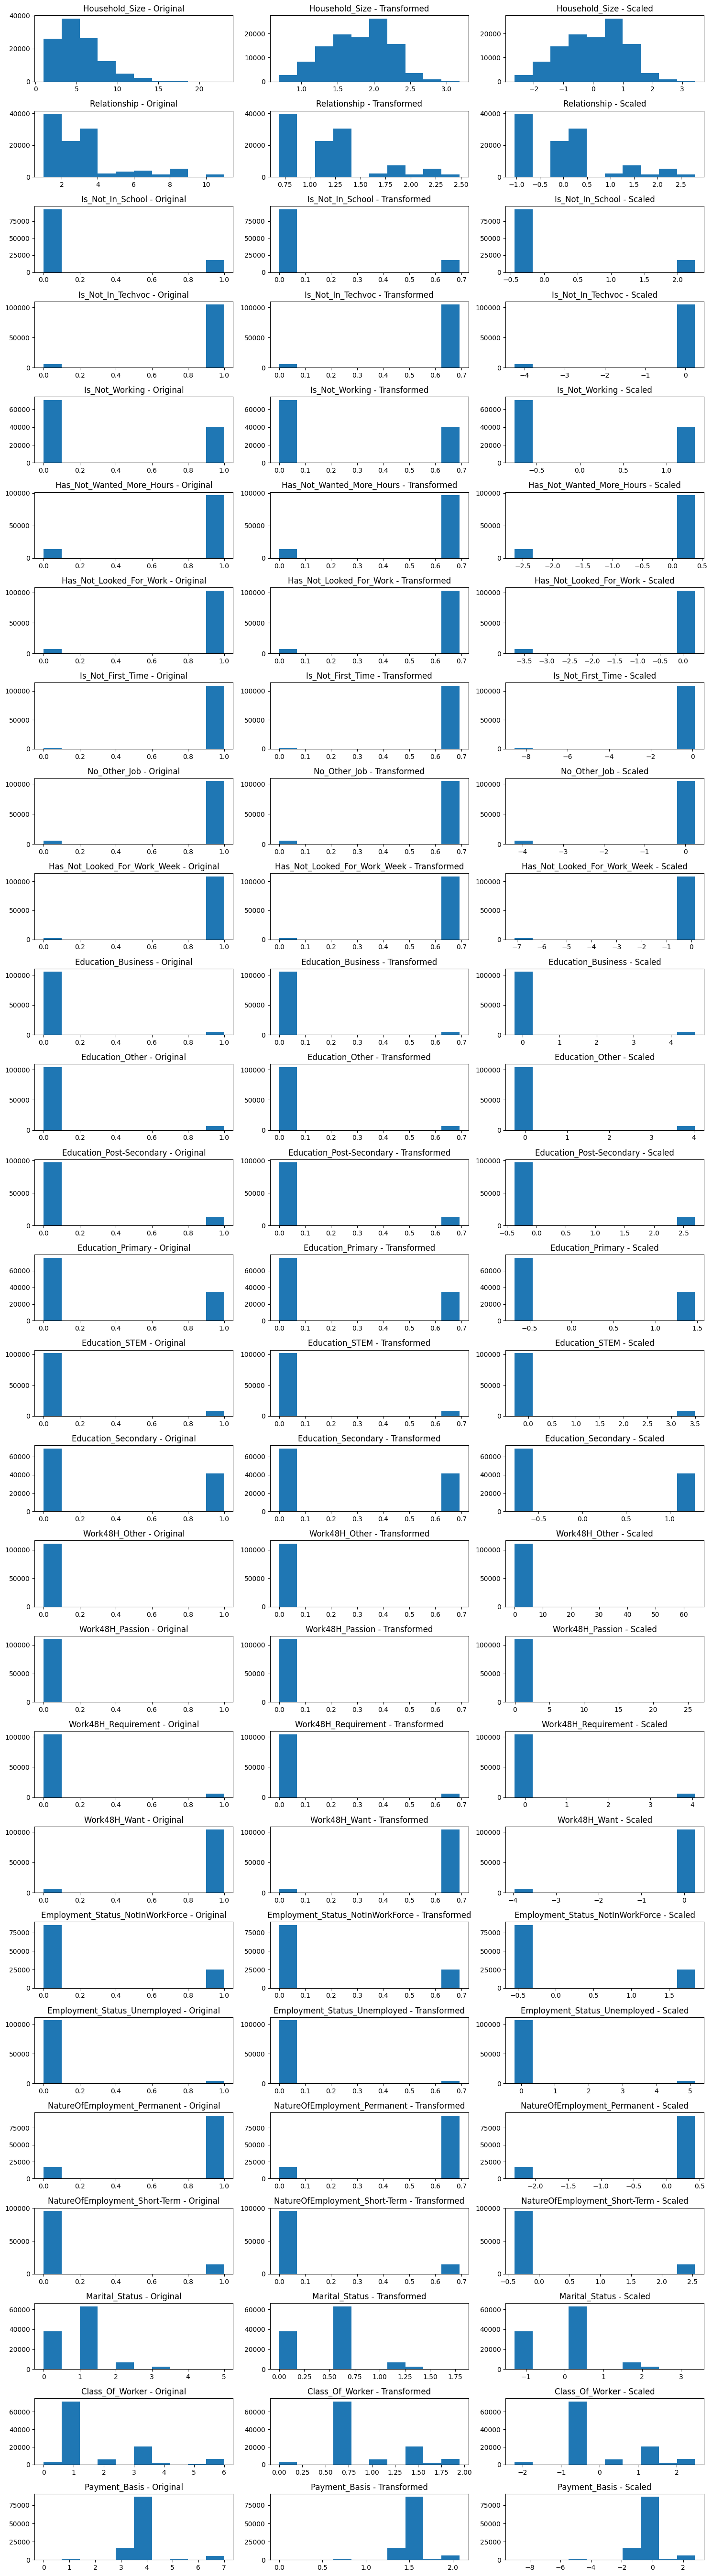

In [34]:
DT.visualize(scaled=True)

## Identify features (X) and labels (y)
Separate the labels from the features for training. This is to ensure the models are properly trained.

In [66]:
target_variable = "Class_Of_Worker"
X = df.drop(columns=[target_variable]).to_numpy()
y = df[target_variable].to_numpy()
X.shape, y.shape  

((110536, 31), (110536,))

## Train-Test Split
This section is dedicated to splitting the dataset into training and testing sets. For consistency, the data will be split using a random seed of 42. and a test_size of 0.2.

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Handling Class Imbalance
To handle class imbalance, we can use the Synthetic Minority Over-sampling Technique (SMOTE) to oversample the minority classes. This technique generates synthetic samples to balance the class distribution.

In [68]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Initial Random Forest Model

### Training a Random Forest Model (Baseline)

We first train a **Random Forest Classifier** without any balancing techniques. 

### **Why Random Forest?**
- Random Forest is a **powerful ensemble learning method** that reduces overfitting by aggregating multiple decision trees.
- It is **robust to noisy data** and handles categorical features effectively.




In [69]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from random_forest_model import preprocess_data, train_random_forest, evaluate_model, train_gradient_boosting

### **Hyperparameters Used:**
Currently, no hyperparamter tuning is involved in the initial model
- n_estimators=200: The number of trees in the forest.
- max_depth=15: The maximum depth of each tree, limiting the complexity of the model.
- min_samples_split=10: The minimum number of samples required to split an internal node, preventing overly small splits.
- min_samples_leaf=5: The minimum number of samples required to be at a leaf node, preventing overly specific rules.
- random_state=42: A seed for reproducibility of results.
- n_jobs=-1: Uses all available processors for parallel computation.
- class_weight='balanced': Adjusts weights inversely proportional to class frequencies to handle class imbalance.

In [70]:
model = train_random_forest(X_train, y_train) # without SMOTE

In [71]:
evaluate_model(model, X_train, y_train, X_test, y_test)

Training Accuracy: 0.7643619667978468
Testing Accuracy: 0.740229781074724
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.33      0.70      0.45       661
           1       0.99      0.81      0.89     14350
           2       0.41      0.81      0.54      1279
           3       0.82      0.51      0.63      4064
           4       0.13      0.43      0.20       449
           5       0.06      0.34      0.09        38
           6       0.46      0.81      0.59      1267

    accuracy                           0.74     22108
   macro avg       0.46      0.63      0.49     22108
weighted avg       0.85      0.74      0.77     22108

Confusion Matrix (Test Data):
[[  465    56    27    33    12     5    63]
 [  723 11552  1223   151   330   193   178]
 [   42    79  1035    32    56    10    25]
 [  100     9   157  2079   828     8   883]
 [    9     1    46   149   195     5    44]
 [   10     9     4     0     1    13  

(0.7643619667978468,
 0.740229781074724,
 '              precision    recall  f1-score   support\n\n           0       0.33      0.70      0.45       661\n           1       0.99      0.81      0.89     14350\n           2       0.41      0.81      0.54      1279\n           3       0.82      0.51      0.63      4064\n           4       0.13      0.43      0.20       449\n           5       0.06      0.34      0.09        38\n           6       0.46      0.81      0.59      1267\n\n    accuracy                           0.74     22108\n   macro avg       0.46      0.63      0.49     22108\nweighted avg       0.85      0.74      0.77     22108\n',
 array([[  465,    56,    27,    33,    12,     5,    63],
        [  723, 11552,  1223,   151,   330,   193,   178],
        [   42,    79,  1035,    32,    56,    10,    25],
        [  100,     9,   157,  2079,   828,     8,   883],
        [    9,     1,    46,   149,   195,     5,    44],
        [   10,     9,     4,     0,     1,    13,

**Results:**
- **Accuracy:** `74.0%`
- **Weakness:** Minority classes (e.g., class 4, 5) are **poorly classified**, suggesting the need for **balancing techniques**.

`Training the model with SMOTE`

In [72]:
model = train_random_forest(X_train_resampled, y_train_resampled) # with SMOTE

In [65]:
evaluate_model(model, X_train, y_train, X_test, y_test)

Training Accuracy: 0.8318066675713575
Testing Accuracy: 0.8122399131536095
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.50      0.61      0.55       661
           1       0.96      0.89      0.92     14350
           2       0.50      0.72      0.59      1279
           3       0.79      0.69      0.74      4064
           4       0.18      0.23      0.20       449
           5       0.03      0.11      0.05        38
           6       0.51      0.77      0.62      1267

    accuracy                           0.81     22108
   macro avg       0.50      0.57      0.52     22108
weighted avg       0.84      0.81      0.82     22108

Confusion Matrix (Test Data):
[[  400   135    16    59     1     3    47]
 [  282 12750   710   238   144   101   125]
 [   14   235   917    48    28    13    24]
 [   62    97   108  2809   300     2   686]
 [    6    21    41   237   105     3    36]
 [    5    26     2     0     0     4 

(0.8318066675713575,
 0.8122399131536095,
 '              precision    recall  f1-score   support\n\n           0       0.50      0.61      0.55       661\n           1       0.96      0.89      0.92     14350\n           2       0.50      0.72      0.59      1279\n           3       0.79      0.69      0.74      4064\n           4       0.18      0.23      0.20       449\n           5       0.03      0.11      0.05        38\n           6       0.51      0.77      0.62      1267\n\n    accuracy                           0.81     22108\n   macro avg       0.50      0.57      0.52     22108\nweighted avg       0.84      0.81      0.82     22108\n',
 array([[  400,   135,    16,    59,     1,     3,    47],
        [  282, 12750,   710,   238,   144,   101,   125],
        [   14,   235,   917,    48,    28,    13,    24],
        [   62,    97,   108,  2809,   300,     2,   686],
        [    6,    21,    41,   237,   105,     3,    36],
        [    5,    26,     2,     0,     0,     4

### Key Takeaways
1. SMOTE `improves recall` for minority classes at the cost of slight precision loss.
Without SMOTE: Model overfits to majority classes.

With SMOTE: More balanced classification, fewer missed instances for underrepresented classes.

2. Confusion matrix `confirms fewer misclassifications` in minority classes.
Fewer cases of Class 4 being misclassified as Class 3 (before: 149, after: 237).

Class 0, 2, and 6 had higher recall after SMOTE.

3. Overall `Accuracy Improvement` (from 74% → 81%)
SMOTE led to a more generalized and fairer model.

### Improving Random Forest Performance

#### Hyperparamter Tuning 

In this section, we optimize the Random Forest Classifier by performing hyperparameter tuning using RandomizedSearchCV. The goal is to improve model performance while balancing training time and generalization.

In [75]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

Defining the Hyperparameter Search Space
We specify a search space for key hyperparameters that impact the model's performance:

- n_estimators:

    - The number of trees in the forest.
    - Possible values: [100, 200, 300].
- max_depth:

    - The maximum depth of each tree. Controls the complexity of the model.
    - Possible values: [10, 20, 30, None] (where None means no limit on depth).
- min_samples_split:

    - The minimum number of samples required to split an internal node. Higher values prevent overfitting.
    - Possible values: [2, 5, 10].
- min_samples_leaf:

    - The minimum number of samples required to be at a leaf node. Higher values prevent overly specific rules.
    - Possible values: [1, 3, 5, 10].
- max_features:

    - The number of features to consider when looking for the best split.
    - Possible values: ['sqrt', 'log2', None]:
    - None: Use all features.
- bootstrap:

    - Whether bootstrap sampling is used when building trees.
    - Possible values: [True, False]:
    - True: Use bootstrap sampling (sampling with replacement).
    - False: Use the entire dataset (no replacement).



In [ ]:

param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [10, 20, 30, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 3, 5, 10],  
    'max_features': ['sqrt', 'log2', None],  
    'bootstrap': [True, False]  
}

In [84]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight="balanced")


In [85]:
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_grid,
    n_iter=15, 
    scoring='accuracy',
    cv=3,  
    verbose=1,
    random_state=42,
    n_jobs=-1  # uses all CPU cores
)

In [86]:
random_search.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1,
                                                    random_state=42),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 3, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy', verbose=1)

In [87]:
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)
print("Best Accuracy from CV:", random_search.best_score_)

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 30, 'bootstrap': True}
Best Accuracy from CV: 0.926410205395764


`Best Params`
- n_estimators=300:

- min_samples_split=2:

- min_samples_leaf=3:

- max_features=None:

- max_depth=30:

- bootstrap=True:



In [88]:
best_rf = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=30, max_features=None, min_samples_leaf=3,
                       n_estimators=300, n_jobs=-1, random_state=42)

In [89]:
evaluate_model(best_rf, X_train, y_train, X_test, y_test)

Training Accuracy: 0.9286425114217216
Testing Accuracy: 0.8335896508051384
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.58      0.51      0.54       661
           1       0.93      0.93      0.93     14350
           2       0.58      0.55      0.56      1279
           3       0.74      0.79      0.76      4064
           4       0.18      0.10      0.13       449
           5       0.05      0.05      0.05        38
           6       0.57      0.58      0.58      1267

    accuracy                           0.83     22108
   macro avg       0.52      0.50      0.51     22108
weighted avg       0.83      0.83      0.83     22108

Confusion Matrix (Test Data):
[[  335   202     8    75     1     4    36]
 [  159 13382   376   291    39    28    75]
 [    5   436   705    93    18     3    19]
 [   42   183    79  3219   148     0   393]
 [    3    37    31   301    47     0    30]
 [    3    31     0     0     1     2 

(0.9286425114217216,
 0.8335896508051384,
 '              precision    recall  f1-score   support\n\n           0       0.58      0.51      0.54       661\n           1       0.93      0.93      0.93     14350\n           2       0.58      0.55      0.56      1279\n           3       0.74      0.79      0.76      4064\n           4       0.18      0.10      0.13       449\n           5       0.05      0.05      0.05        38\n           6       0.57      0.58      0.58      1267\n\n    accuracy                           0.83     22108\n   macro avg       0.52      0.50      0.51     22108\nweighted avg       0.83      0.83      0.83     22108\n',
 array([[  335,   202,     8,    75,     1,     4,    36],
        [  159, 13382,   376,   291,    39,    28,    75],
        [    5,   436,   705,    93,    18,     3,    19],
        [   42,   183,    79,  3219,   148,     0,   393],
        [    3,    37,    31,   301,    47,     0,    30],
        [    3,    31,     0,     0,     1,     2

### Results

The Random Forest model achieved a training accuracy of 92.86% and a testing accuracy of 83.36% from the hyperparameter tuning, indicating that the model generalizes well to unseen data but has a slight tendency toward overfitting.

Key Observations:
- Class 1 (Majority Class) has High Precision and Recall

    - Precision: 93%, Recall: 93% → The model effectively classifies this dominant class.

- Minority Classes (Classes 4 & 5) Have Low Performance

    - Class 4: Recall = 10%, Class 5: F1-score = 5%

    - Indicates difficulty in predicting underrepresented categories, possibly due to data imbalance.

### K-NN Algorithm

##### Using K-NN as a machine learning model for classification in  with the target variable of **Class_Of_Worker** to identify if K-NN is an accurate model to use with hyperparameters.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
transformed_df

NameError: name 'transformed_df' is not defined

In [ ]:
X = transformed_df.drop('Class_Of_Worker', axis=1)
y = transformed_df['Class_Of_Worker']

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Hyperparameter tuning using Optuna for a faster and smarter searching, and automatiacally finding the best parameters.

In [ ]:
def objective(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 50, 500, step=50)  # Optimize k
    model = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance', metric='euclidean')
    return cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()


In [ ]:
study = optuna.create_study(direction='maximize')


In [ ]:
study.optimize(objective, n_trials=10)

# Print best parameters
print("Best hyperparameters:", study.best_params)

Best hyperparameter detected was n_neighbors = 50

In [ ]:
best_knn = KNeighborsClassifier(n=50)
best_knn.fit(X_train, y_train)

In [ ]:
y_pred = best_knn.predict(X_test)

In [ ]:
print("\n" + classification_report(y_test, y_pred) + "\n")
print(confusion_matrix(y_test, y_pred))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Artificial Neural Networks
Let us make predictions using an artificial neural network (ANN). We will first do so using default or commonly used parameters. Then, we will perform performance enhancing techniques to improve the model's performance.

## Import Necessary Modules 
We will need to import the NeuralNetwork class from neural_network.py as well as other relevant modules


In [79]:
import torch
import pandas as pd
from neural_network import  train_neural_network, evaluate_model, tune_hyperparameters

## Initialize the model

In [90]:
"""
Idenfifying the target column and the features, as well as splitting the datainto training
and test sets are no longer necessary as they had already been done earlier in the notebook.

"""

# Get input size and number of classes
input_size = X_train.shape[1]
num_classes = len(set(y_train))

# Define initial model parameters
list_hidden = [64, 32] 
activation = 'relu'
learning_rate = 0.01
epochs = 100


## Train the model 
Perform an initial training of the model using the default parameters

In [91]:
initial_model = train_neural_network(X_train, y_train, input_size, list_hidden, num_classes, activation, epochs, learning_rate)

Epoch [10/100], Loss: 1.0788
Epoch [20/100], Loss: 1.0054
Epoch [30/100], Loss: 0.9415
Epoch [40/100], Loss: 0.8694
Epoch [50/100], Loss: 0.8122
Epoch [60/100], Loss: 0.7552
Epoch [70/100], Loss: 0.7243
Epoch [80/100], Loss: 0.7742
Epoch [90/100], Loss: 0.7333
Epoch [100/100], Loss: 0.6939


## Evaluate Model on Test Set

In [93]:
evaluate_model(initial_model, X_test, y_test)

Accuracy: 0.7489596526144382
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.08      0.14       661
           1       0.84      0.90      0.87     14350
           2       0.49      0.49      0.49      1279
           3       0.57      0.62      0.60      4064
           4       0.00      0.00      0.00       449
           5       0.00      0.00      0.00        38
           6       0.48      0.35      0.41      1267

    accuracy                           0.75     22108
   macro avg       0.45      0.35      0.36     22108
weighted avg       0.73      0.75      0.73     22108

Confusion Matrix:
[[   50   372     6   198     0     0    35]
 [   12 12902   428   851     0     0   157]
 [    0   503   621   138     0     0    17]
 [    0  1137   138  2537     0     0   252]
 [    0   129    50   255     0     0    15]
 [    1    29     2     0     0     0     6]
 [    2   333    32   452     0     0   448]]


d:\VSCODE Projects\Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VSCODE Projects\Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VSCODE Projects\Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VSCODE Projects\

(0.7489596526144382,
 '              precision    recall  f1-score   support\n\n           0       0.77      0.08      0.14       661\n           1       0.84      0.90      0.87     14350\n           2       0.49      0.49      0.49      1279\n           3       0.57      0.62      0.60      4064\n           4       0.00      0.00      0.00       449\n           5       0.00      0.00      0.00        38\n           6       0.48      0.35      0.41      1267\n\n    accuracy                           0.75     22108\n   macro avg       0.45      0.35      0.36     22108\nweighted avg       0.73      0.75      0.73     22108\n',
 array([[   50,   372,     6,   198,     0,     0,    35],
        [   12, 12902,   428,   851,     0,     0,   157],
        [    0,   503,   621,   138,     0,     0,    17],
        [    0,  1137,   138,  2537,     0,     0,   252],
        [    0,   129,    50,   255,     0,     0,    15],
        [    1,    29,     2,     0,     0,     0,     6],
        [  

## Initial Results
The model with default hyperparameters produced an accuracy of `74.8960%`. However, based on the classification report, classes 4 and 5 were never predicted at all (recall=0.00), indicating that they are underrepresented in the model's predictions. For now, let us perform hyperparameter tuning.

## Hyperparameter Tuning
Perform hyperparameter tuning using Optuna

In [86]:
best_params = tune_hyperparameters(X_train, y_train, input_size, num_classes, n_trials=40)
print("Best Hyperparameters:", best_params)

[I 2025-03-31 00:03:01,942] A new study created in memory with name: no-name-fd63aff3-57b8-4916-b0b3-c62f4fe49260
[I 2025-03-31 00:03:42,068] Trial 0 finished with value: 0.7484280996969286 and parameters: {'num_layers': 3, 'hidden_0': 78, 'hidden_1': 67, 'hidden_2': 16, 'learning_rate': 0.026186127656883308, 'activation': 'relu', 'epochs': 197}. Best is trial 0 with value: 0.7484280996969286.
[I 2025-03-31 00:03:44,127] Trial 1 finished with value: 0.7217057945447144 and parameters: {'num_layers': 1, 'hidden_0': 16, 'learning_rate': 0.05666257393516716, 'activation': 'relu', 'epochs': 67}. Best is trial 0 with value: 0.7484280996969286.
[I 2025-03-31 00:03:48,971] Trial 2 finished with value: 0.6893630976613743 and parameters: {'num_layers': 1, 'hidden_0': 57, 'learning_rate': 0.0331474648894546, 'activation': 'relu', 'epochs': 57}. Best is trial 0 with value: 0.7484280996969286.
[I 2025-03-31 00:03:55,694] Trial 3 finished with value: 0.740726919075406 and parameters: {'num_layers': 

Best Hyperparameters: {'num_layers': 2, 'hidden_0': 24, 'hidden_1': 101, 'learning_rate': 0.0081603746771058, 'activation': 'relu', 'epochs': 161}


## Results

Performing 40 trials of hyperparameter tuning with Optuna, the following values hyperparameters were found to be the best:
- num-layers: 2
- hidden_list [24, 101]
- learning_rate: 0.0081603746771058
- activation: 'relu'
- epochs: 161

## Retrain the Model
Apply the best hyperparameters to the same model

In [94]:
# Redefine the hyperparemeters
list_hidden = [24, 101] 
activation = 'relu'
learning_rate = 0.0081603746771058
epochs = 161

tuned_model = train_neural_network(X_train, y_train, input_size, list_hidden, num_classes, activation, epochs, learning_rate)

Epoch [10/161], Loss: 1.0775
Epoch [20/161], Loss: 1.0279
Epoch [30/161], Loss: 0.9701
Epoch [40/161], Loss: 0.8862
Epoch [50/161], Loss: 0.8140
Epoch [60/161], Loss: 0.7448
Epoch [70/161], Loss: 0.6933
Epoch [80/161], Loss: 0.6576
Epoch [90/161], Loss: 0.6177
Epoch [100/161], Loss: 0.5822
Epoch [110/161], Loss: 0.5744
Epoch [120/161], Loss: 0.5334
Epoch [130/161], Loss: 0.5210
Epoch [140/161], Loss: 0.5053
Epoch [150/161], Loss: 0.4945
Epoch [160/161], Loss: 0.4874


## Evaluate the Retrained Model

In [96]:
evaluate_model(tuned_model, X_test, y_test)

Accuracy: 0.8276189614619143
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.33      0.44       661
           1       0.89      0.96      0.92     14350
           2       0.63      0.39      0.49      1279
           3       0.69      0.83      0.76      4064
           4       0.00      0.00      0.00       449
           5       0.00      0.00      0.00        38
           6       0.67      0.35      0.46      1267

    accuracy                           0.83     22108
   macro avg       0.50      0.41      0.44     22108
weighted avg       0.80      0.83      0.81     22108

Confusion Matrix:
[[  218   332     4    91     0     0    16]
 [   67 13752   183   302     0     0    46]
 [    2   641   505   125     0     0     6]
 [   26   455    65  3377     1     0   140]
 [    2    70    21   345     0     0    11]
 [    6    29     0     0     0     0     3]
 [   15   155    20   632     0     0   445]]


d:\VSCODE Projects\Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VSCODE Projects\Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VSCODE Projects\Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\VSCODE Projects\

(0.8276189614619143,
 '              precision    recall  f1-score   support\n\n           0       0.65      0.33      0.44       661\n           1       0.89      0.96      0.92     14350\n           2       0.63      0.39      0.49      1279\n           3       0.69      0.83      0.76      4064\n           4       0.00      0.00      0.00       449\n           5       0.00      0.00      0.00        38\n           6       0.67      0.35      0.46      1267\n\n    accuracy                           0.83     22108\n   macro avg       0.50      0.41      0.44     22108\nweighted avg       0.80      0.83      0.81     22108\n',
 array([[  218,   332,     4,    91,     0,     0,    16],
        [   67, 13752,   183,   302,     0,     0,    46],
        [    2,   641,   505,   125,     0,     0,     6],
        [   26,   455,    65,  3377,     1,     0,   140],
        [    2,    70,    21,   345,     0,     0,    11],
        [    6,    29,     0,     0,     0,     0,     3],
        [  

## Results
The retrained model produced a test accuracy of `82.7619%`, which is higher than the initial accuracy of `74.8960%`. Let us perform a paired t-test to see if the hyperparameter tuning resulted in a significant model improvement.


## Statistical Tests

In [97]:
from scipy.stats import ttest_ind
from sklearn.metrics import accuracy_score

# Get predictions from both models
y_pred_initial = initial_model.predict(torch.tensor(X_test, dtype=torch.float32)).numpy()
y_pred_optimized = tuned_model.predict(torch.tensor(X_test, dtype=torch.float32)).numpy()

# Compute accuracy scores
acc_initial = accuracy_score(y_test, y_pred_initial)
acc_optimized = accuracy_score(y_test, y_pred_optimized)

# Perform statistical test (paired t-test)
t_stat, p_value = ttest_ind(y_pred_initial, y_pred_optimized)

print(f"Initial Model Accuracy: {acc_initial:.4f}")
print(f"Optimized Model Accuracy: {acc_optimized:.4f}")
print(f"T-test Statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("The improvement in model accuracy is statistically significant.")
else:
    print("No significant improvement in model accuracy.")


Initial Model Accuracy: 0.7490
Optimized Model Accuracy: 0.8276
T-test Statistic: 4.7574, P-value: 0.0000
The improvement in model accuracy is statistically significant.
